*Please run this notebook using your base environment*

# <Center> Data First Look and EDA

### Project Overview:

The current aim for this project is to produce an app that can predict the likelyhood of heart disease for its users. In addition to this, the app will be able to return recommendations of areas in which lifestyle improvements will return the greatest value for time invested by the user. The app could be used by the general public as well as by doctors as an aid to them. 

The business value for an app like this can be summarised with these two facts:
1. CVD cost in USA alone is estimated to be $555 billion per
year.
2. Early intervention is proven to reduce the financial burden. For every $1 spent on preventive measures an estimated $7 can be saved in the long run.

This app would aim to provide a cheap source of "Early intervention" for the general public to use and for doctors to promote.

To create such an app I need to answer a few key questions.
1. What are the Key Indicators of heart disease?
2. How do these Key Indicators affect our risk of cardiovascular disease?
3. How can we use this to provide personalised, actionable advice?

To accurately answer these questions, we need a data source with a target variable of CVD diagnosis that also contains metrics such as blood pressure, cholesterol level and heart rate along with lifestyle survey features.

Finding a dataset like the one described is difficult, a comprimise will be to find two separate datasets, one containing granular metrics on the cardiovascular system and one containing lifestyle features. Two models can be created and the average of the two models can be used as the risk prediction. Key indicators and contribution towards CVD can be garnered from the lifestyle dataset.

In practice, the only dataset I could find was a 'lifestyle one' from the CDC. I found a more granular dataset on a public forum called the IEEE dataport. The integrity/trustworthiness of this dataset is questionable. The paper that the dataset is originally from is in fact a Kaggle dataset. When checking the source from kaggle, i'm returned to the same paper that references Kaggle, i.e. data citations are a circle.

Given this revalation, i'm going to try and complete this project with just the CDC dataset.
 
#### Where did the dataset come from and what treatments did it undergo prior to loading?

Originally, the dataset come from the CDC and is a major part of the Behavioral Risk Factor Surveillance System (BRFSS), which conducts annual telephone surveys to gather data on the health status of U.S. residents. "Established in 1984 with 15 states, BRFSS now collects data in all 50 states as well as the District of Columbia and three U.S. territories. BRFSS completes more than 400,000 adult interviews each year, making it the largest continuously conducted health survey system in the world.". The original dataset contains near 280 features, the dataset available to me has been distilled down to 18 features. One downside to this is that feature engineering has been performed for me. Creating new features from the ones available seems futile after a detailed inspection.

#### Data Dictionary: 

**HeartDisease**: Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI).

**BMI**: Body Mass Index (BMI).

**Smoking**: Have you smoked at least 100 cigarettes in your entire life?

**AlcoholDrinking**: Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week

**Stroke**: (Ever told) (you had) a stroke?

**PhysicalHealth**: Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good? (0-30 days).

**MentalHealth**: Thinking about your mental health, for how many days during the past 30 days was your mental health not good? (0-30 days).

**DiffWalking**: Do you have serious difficulty walking or climbing stairs?

**Sex**: Are you male or female?

**AgeCategory**: Fourteen-level age category. (then calculated the mean)

**Race**: Imputed race/ethnicity value.

**Diabetic**: (Ever told) (you had) diabetes?

**PhysicalActivity**: Adults who reported doing physical activity or exercise during the past 30 days other than their regular job.

**GenHealth**: Would you say that in general your health is...

**SleepTime**: On average, how many hours of sleep do you get in a 24-hour period?

**Asthma**: (Ever told) (you had) asthma?

**KidneyDisease**: Not including kidney stones, bladder infection or incontinence, were you ever told you had kidney disease?

**SkinCancer**: (Ever told) (you had) skin cancer?


Most of the features in this dataset will be used primarily to aid in predictive power of CVD. The features that could realistically be used to advise on lifestyle improvements are BMI, Smoking, Alcohol Drinking, Physical activity, sleep time and mental health. The values in these features arent overly precise, as such, I think this project may end up being a proof of principle for how a personalised app might work with better data. Hopefully all the techniques displayed in these notebooks will show how a high quality app might be built regardless of the final outcomes. 



### Stage One EDA

In [1]:
# Importing the required packages

# Data manipulation
import numpy as np
import pandas as pd

# Data visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical analysis
from scipy import stats


In [2]:
# Loading the dataset
lifestyle_df = pd.read_csv("~/Desktop/BrainStation_Bootcamp/capstone/capstone-project-ollieleach95/src/data/lifestyle_heart_data.csv")

In [3]:
lifestyle_df.head(10)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
5,Yes,28.87,Yes,No,No,6.0,0.0,Yes,Female,75-79,Black,No,No,Fair,12.0,No,No,No
6,No,21.63,No,No,No,15.0,0.0,No,Female,70-74,White,No,Yes,Fair,4.0,Yes,No,Yes
7,No,31.64,Yes,No,No,5.0,0.0,Yes,Female,80 or older,White,Yes,No,Good,9.0,Yes,No,No
8,No,26.45,No,No,No,0.0,0.0,No,Female,80 or older,White,"No, borderline diabetes",No,Fair,5.0,No,Yes,No
9,No,40.69,No,No,No,0.0,0.0,Yes,Male,65-69,White,No,Yes,Good,10.0,No,No,No


In [4]:
def basic_eda(df, df_name):
    """
    getting some basic information about the dataframe
    shape of dataframe i.e. number of rows and columns
    total number of rows with null values
    total number of duplicates
    data types of columns

    Args:
        df (dataframe): dataframe containing the data for analysis
        df_name (string): name of the dataframe
    """
    print(df_name.upper())
    print()
    print(f"Rows: {df.shape[0]} \t Columns: {df.shape[1]}")
    print()

    print(f"Total null rows: {df.isnull().sum().sum()}")
    print(f"Percentage null rows: {round(df.isnull().sum().sum() / df.shape[0] * 100, 2)}%")
    print()

    print(f"Total duplicate rows: {df[df.duplicated()].shape[0]}")
    print(f"Percentage dupe rows: {round(df[df.duplicated()].shape[0] / df.shape[0] * 100, 2)}%")
    print()

    print(df.info())
    print("-----\n")
basic_eda(lifestyle_df, 'Lifestyle CVD data')

LIFESTYLE CVD DATA

Rows: 319795 	 Columns: 18

Total null rows: 0
Percentage null rows: 0.0%

Total duplicate rows: 18078
Percentage dupe rows: 5.65%

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth   

A quick EDA reveals we have ~320k rows and 18 columns. There are no missing values, but there are 18000 duplicates. Lets deal with these duplicates prior to any further EDA

In [5]:
# Filtering for duplicated rows and dropping them
duplicates = lifestyle_df[lifestyle_df.duplicated()]
lifestyle_df = lifestyle_df.drop(duplicates.index)

basic_eda(lifestyle_df, 'Lifestyle CVD data')

LIFESTYLE CVD DATA

Rows: 301717 	 Columns: 18

Total null rows: 0
Percentage null rows: 0.0%

Total duplicate rows: 0
Percentage dupe rows: 0.0%

<class 'pandas.core.frame.DataFrame'>
Int64Index: 301717 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      301717 non-null  object 
 1   BMI               301717 non-null  float64
 2   Smoking           301717 non-null  object 
 3   AlcoholDrinking   301717 non-null  object 
 4   Stroke            301717 non-null  object 
 5   PhysicalHealth    301717 non-null  float64
 6   MentalHealth      301717 non-null  float64
 7   DiffWalking       301717 non-null  object 
 8   Sex               301717 non-null  object 
 9   AgeCategory       301717 non-null  object 
 10  Race              301717 non-null  object 
 11  Diabetic          301717 non-null  object 
 12  PhysicalActivity  301717 non-null  object 
 13  GenHealth        

Duplicates have been removed, lets continue with a high level EDA.

In [6]:
# Performing a .describe on the numeric columns 
lifestyle_df.describe().T.style.background_gradient(cmap='BuGn')

,count,mean,std,min,25%,50%,75%,max
BMI,301717.000000,28.441970,6.468134,12.020000,24.030000,27.410000,31.650000,94.850000
PhysicalHealth,301717.000000,3.572298,8.140656,0.000000,0.000000,0.000000,2.000000,30.000000
MentalHealth,301717.000000,4.121475,8.128288,0.000000,0.000000,0.000000,4.000000,30.000000
SleepTime,301717.000000,7.084559,1.467122,1.000000,6.000000,7.000000,8.000000,24.000000


In [7]:
# Performing a .describe on the non-numeric columns
lifestyle_df.describe(include= 'object').T

,count,unique,top,freq
HeartDisease,301717,2,No,274456
Smoking,301717,2,No,174312
AlcoholDrinking,301717,2,No,280136
Stroke,301717,2,No,289653
DiffWalking,301717,2,No,257362
Sex,301717,2,Female,159671
AgeCategory,301717,13,65-69,31670
Race,301717,6,White,227724
Diabetic,301717,4,No,251796
PhysicalActivity,301717,2,Yes,230412


From our `describe` I can see there are quite a few columns that could benefit from one-hot/dummy encoding. We'll leave that for now, but prior to any plotting of data lets check whether the data types of our columns make sense. 

In [8]:
# Lets look at the number of unique values in our object columns
for column_name in lifestyle_df.columns:
    unique_values = len(lifestyle_df[column_name].unique())
    print("Feature '{column_name}' has '{unique_values}' unique values".format(column_name = column_name,
                                                                                         unique_values=unique_values))

Feature 'HeartDisease' has '2' unique values
Feature 'BMI' has '3604' unique values
Feature 'Smoking' has '2' unique values
Feature 'AlcoholDrinking' has '2' unique values
Feature 'Stroke' has '2' unique values
Feature 'PhysicalHealth' has '31' unique values
Feature 'MentalHealth' has '31' unique values
Feature 'DiffWalking' has '2' unique values
Feature 'Sex' has '2' unique values
Feature 'AgeCategory' has '13' unique values
Feature 'Race' has '6' unique values
Feature 'Diabetic' has '4' unique values
Feature 'PhysicalActivity' has '2' unique values
Feature 'GenHealth' has '5' unique values
Feature 'SleepTime' has '24' unique values
Feature 'Asthma' has '2' unique values
Feature 'KidneyDisease' has '2' unique values
Feature 'SkinCancer' has '2' unique values


Comments:
- I'd expect `Diabetic` to be binary, but it appears to have more than two values, 

- Our age column only has 13 unique values.

- Need to investigate what the categories of `GenHealth` are.

- The max value for sleeptime is 24, this cant be correct.

Actions:
Investigate all mentioned columns above and decide on any data manipulation to perform.

In [9]:
# Lets have a quick look at the unique values for 

print(lifestyle_df['AgeCategory'].unique())
print(lifestyle_df['SleepTime'].unique())
print(lifestyle_df['Diabetic'].unique())
print(lifestyle_df['GenHealth'].unique())


['55-59' '80 or older' '65-69' '75-79' '40-44' '70-74' '60-64' '50-54'
 '45-49' '18-24' '35-39' '30-34' '25-29']
[ 5.  7.  8.  6. 12.  4.  9. 10. 15.  3.  2.  1. 16. 18. 14. 20. 11. 13.
 17. 24. 19. 21. 22. 23.]
['Yes' 'No' 'No, borderline diabetes' 'Yes (during pregnancy)']
['Very good' 'Fair' 'Good' 'Poor' 'Excellent']


- The AgeCategory column needs to be converted to numeric. To do so i'm going to bin them by average value of each category.

- As suspected, the SleepTime column has every value ranging from 1-24. Getting on average <2 or > 13 hours of sleep a day is highly unlikely and I imagine these are erroneous data points. 

- I'll leave the `Diabetic` column for data preprocessing later.

- The `GenHealth` column could benefit from ordinal encoding. A downside to this, however, is that the value of `fair` (2) would be intepreted as double that of `poor` (1) when in reality this is not the case. With this in mind, im going to leave this column how it is until we get to the preprocessing stage.

In [10]:
# Lets check how much data we'll lose from removing erroneous SleepTime values
1 - ((lifestyle_df['SleepTime'] > 2.0) & (lifestyle_df['SleepTime'] < 13.0)).mean()

0.007748983318805358

It seems that less than 1% of the data falls outside of this range. I feel confident in removing the erroneous values without losing too much information.

In [11]:
# Dealing with SleepTime column
lifestyle_df = lifestyle_df[(lifestyle_df['SleepTime'] > 2.0) & (lifestyle_df['SleepTime'] < 13.0)]


In [12]:
# Converting the AgeCategory Column
encode_AgeCategory = {'55-59':57, '80 or older':80, '65-69':67,
                      '75-79':77,'40-44':42,'70-74':72,'60-64':62,
                      '50-54':52,'45-49':47,'18-24':21,'35-39':37,
                      '30-34':32,'25-29':27}

lifestyle_df['AgeCategory'] = lifestyle_df['AgeCategory'].map(encode_AgeCategory).astype('int')

We've seen above, that the unique values in SleepTime are all whole numbers. Given that there are 31 unique values in the `PhysicalHealth` and `MentalHealth` columns, I suspect they are whole numbers too. Im going to quickly sanity check this before converting these columns from `float` to `int`.

In [13]:
print(lifestyle_df['PhysicalHealth'].unique())
print(lifestyle_df['MentalHealth'].unique())

[ 3.  0. 20. 28.  6. 15.  5.  7.  1.  2. 30. 21.  4. 10. 14. 18.  8. 25.
 16. 29. 27. 17. 24. 12. 23. 26. 22. 19.  9. 13. 11.]
[30.  0.  2.  5. 15.  8.  4.  3. 10. 14. 20.  1.  7. 24.  9. 28. 16. 12.
  6. 25. 17. 18. 21. 29. 22. 13. 23. 27. 26. 11. 19.]


In [14]:
# Converting to int

lifestyle_df['PhysicalHealth'] = lifestyle_df['PhysicalHealth'].astype(int)
lifestyle_df['MentalHealth'] = lifestyle_df['MentalHealth'].astype(int)
lifestyle_df['SleepTime'] = lifestyle_df['SleepTime'].astype(int)
lifestyle_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299379 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      299379 non-null  object 
 1   BMI               299379 non-null  float64
 2   Smoking           299379 non-null  object 
 3   AlcoholDrinking   299379 non-null  object 
 4   Stroke            299379 non-null  object 
 5   PhysicalHealth    299379 non-null  int64  
 6   MentalHealth      299379 non-null  int64  
 7   DiffWalking       299379 non-null  object 
 8   Sex               299379 non-null  object 
 9   AgeCategory       299379 non-null  int64  
 10  Race              299379 non-null  object 
 11  Diabetic          299379 non-null  object 
 12  PhysicalActivity  299379 non-null  object 
 13  GenHealth         299379 non-null  object 
 14  SleepTime         299379 non-null  int64  
 15  Asthma            299379 non-null  object 
 16  KidneyDisease     29

---


## Stage Two EDA

We're ready to investigate distributions and gain insights through plotting now.


In [15]:
# Let's set a palette/diverge to create our visualisations with
custom_palette = ['#89CFF0','#d5014d']


In [16]:
custom_diverge = sns.diverging_palette(245, 5)

As a first step, lets investgate the weighting of our target variable.

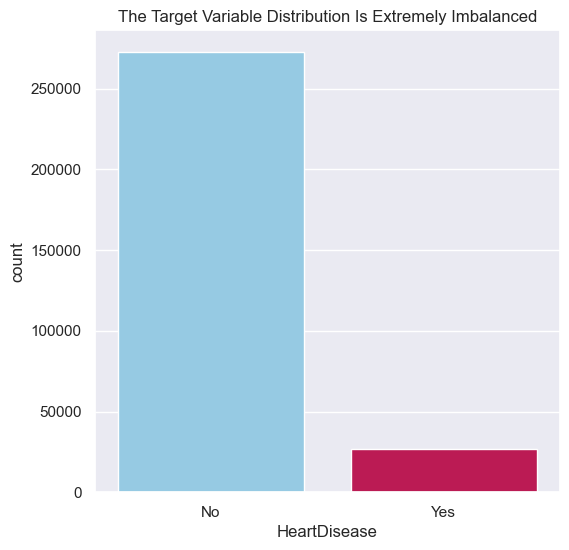

In [17]:

# Set style and figure size
sns.set(style="whitegrid")
sns.set(rc={'figure.figsize':(6,6)})

# Create count plot of HeartDisease column in lifestyle_df using custom_palette
custom_palette = {"No": "#89CFF0", "Yes": "#d5014d"}
sns.countplot(x='HeartDisease',data=lifestyle_df, palette=custom_palette)

# Set title
plt.title('The Target Variable Distribution Is Extremely Imbalanced')

# Show the plot
plt.show()



There is a very imbalanced distribution. We need to upsample the positive CVD values. To do so we'll use SMOTE upsampling, this will decrease the variance of the data, we'll have to keep this in mind when performing PCA. We'll continue with EDA prior to performing a SMOTE upsample later in the notebook.

Let's split our categorical and numerical values.

In [18]:
# Extracting numeric and categorical columns
num_col_list = list(lifestyle_df.select_dtypes("number").columns)
cat_col_list = list(lifestyle_df.select_dtypes("object").columns)
print("Numerical columns:\n", '\n'.join(num_col_list))
print()
print("Categorical columns:\n", '\n'.join(cat_col_list))


Numerical columns:
 BMI
PhysicalHealth
MentalHealth
AgeCategory
SleepTime

Categorical columns:
 HeartDisease
Smoking
AlcoholDrinking
Stroke
DiffWalking
Sex
Race
Diabetic
PhysicalActivity
GenHealth
Asthma
KidneyDisease
SkinCancer


Now we have our categorical and numerical columns, lets perform some EDA.

### Numerical EDA

We'll create a histogram for BMI as it is the only continous feature, for the rest we'll use KDE plots. First, lets check the range of BMI and discuss outliers.

In [19]:
print(lifestyle_df['BMI'].min())
print(lifestyle_df['BMI'].max())

12.02
94.85


The BMI column has a max value of 94.85, this value is fairly unpecedented. From a quick google, anything over 40 puts you way past the 99th percentile of BMIs.
That being said, it is possible to have a BMI this high so we'll leave it in. The BMI of 12.02 is very low, but valid. We'll leave this in too.

Some models are sensitive to outliers, but hopefully optimising the scaler we use will account for this.

BMI:

Text(0.5, 1.0, 'Q-Q plot of BMI in People With Heart Disease')

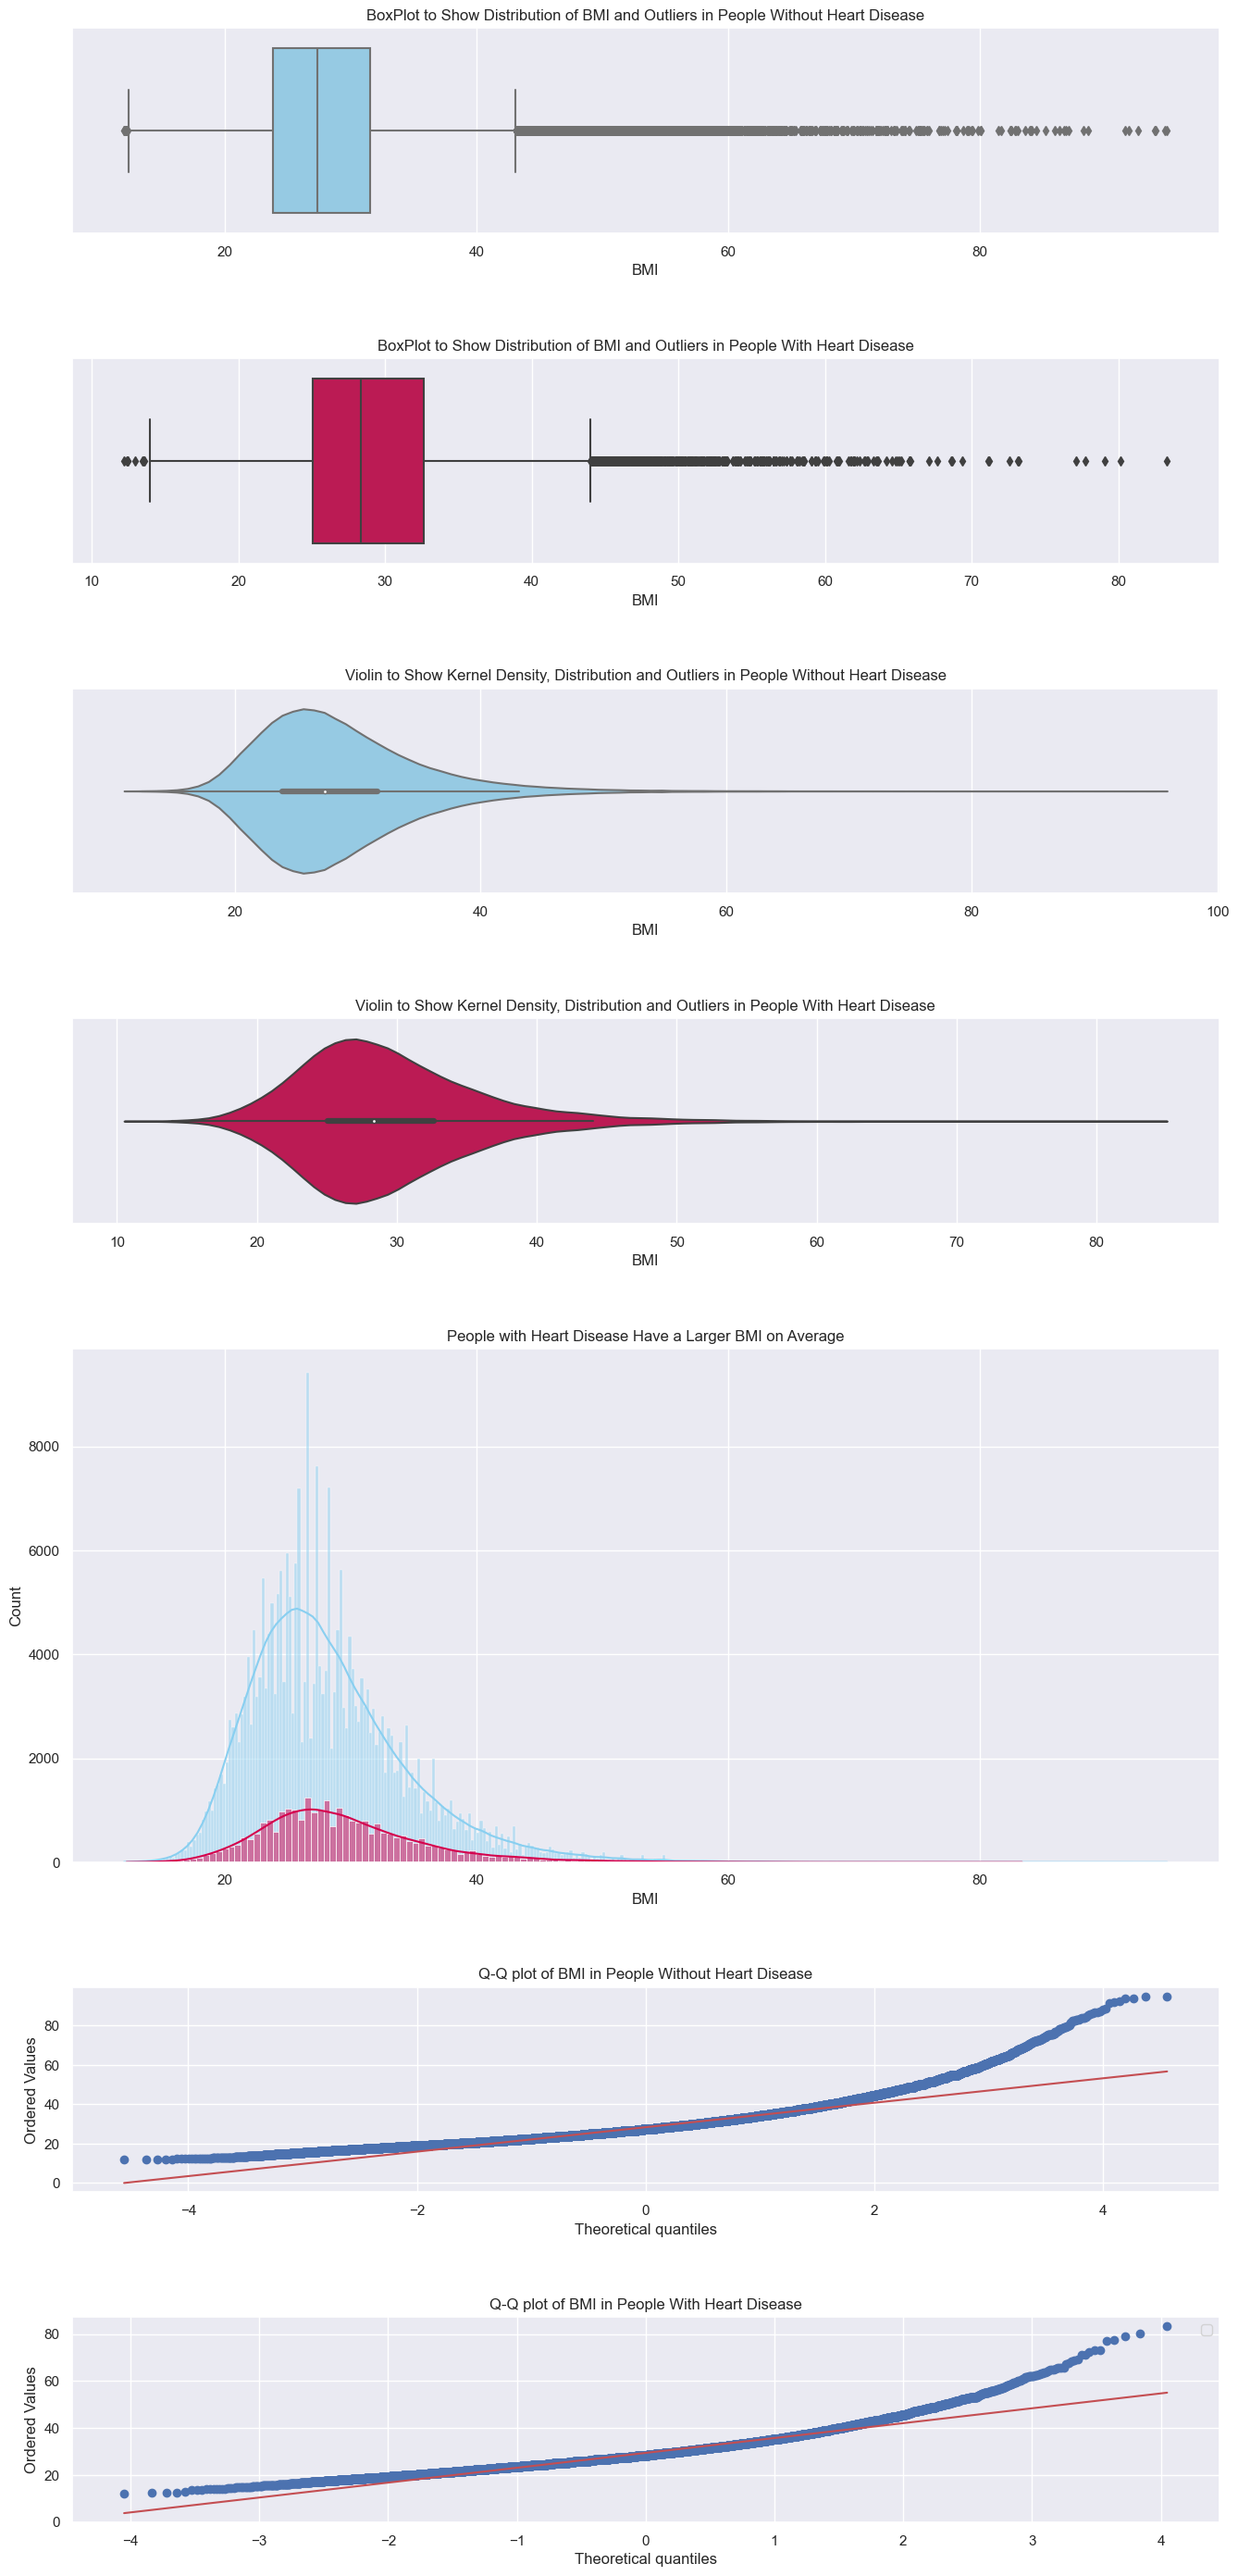

In [20]:
custom_palette = ['#89CFF0','#d5014d']

# Setting the style and size of the plots
sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(16,35)})

# Creating subplots for the plots
fig, ax = plt.subplots(7, gridspec_kw={"height_ratios": (.4, .4, .4, .4, 1, .4, .4)})
fig.subplots_adjust(hspace=0.5)

# Creating boxplots to show the distribution of BMI in people with and without heart disease
BMI_Box_No_CVD = sns.boxplot(x = lifestyle_df[lifestyle_df['HeartDisease']=='No']['BMI'], ax=ax[0], color=custom_palette[0])
BMI_Box_CVD = sns.boxplot(x = lifestyle_df[lifestyle_df['HeartDisease']=='Yes']['BMI'], ax=ax[1], color=custom_palette[1])

# Creating violin plots to show the kernel density, distribution, and outliers in people with and without heart disease
BMI_Violin_No_CVD = sns.violinplot(x = lifestyle_df[lifestyle_df['HeartDisease']=='No']['BMI'], ax=ax[2], color=custom_palette[0])
BMI_Violin_CVD = sns.violinplot(x = lifestyle_df[lifestyle_df['HeartDisease']=='Yes']['BMI'], ax=ax[3], color=custom_palette[1])

# Creating histograms to show the distribution of BMI in people with and without heart disease
sns.histplot(lifestyle_df[lifestyle_df['HeartDisease']=='No'], x="BMI", kde=True, color=custom_palette[0], ax = ax[4])
sns.histplot(lifestyle_df[lifestyle_df['HeartDisease']=='Yes'], x="BMI", kde=True, color=custom_palette[1], ax = ax[4])
plt.legend(labels = ['No Heart Disease', 'Heart Disease'])

# Creating Q-Q plots to show the distribution of BMI in people with and without heart disease
stats.probplot(lifestyle_df[lifestyle_df['HeartDisease']=='No']['BMI'],  plot=ax[5])
stats.probplot(lifestyle_df[lifestyle_df['HeartDisease']=='Yes']['BMI'], plot=ax[6])

# Setting the titles for each plot
ax[0].set_title('BoxPlot to Show Distribution of BMI and Outliers in People Without Heart Disease')
ax[1].set_title('BoxPlot to Show Distribution of BMI and Outliers in People With Heart Disease')
ax[2].set_title('Violin to Show Kernel Density, Distribution and Outliers in People Without Heart Disease')
ax[3].set_title('Violin to Show Kernel Density, Distribution and Outliers in People With Heart Disease')
ax[4].set_title('People with Heart Disease Have a Larger BMI on Average')
ax[5].set_title('Q-Q plot of BMI in People Without Heart Disease')
ax[6].set_title('Q-Q plot of BMI in People With Heart Disease')

Despite skewness in the tails, the overall ditribution of BMI looks to be normal. Lets confirm this with a shapiro wilk test.

Our null hypothesis is that the data is not normally distributed. We'll set a threshold of 0.05. 

In [21]:
# Performing shapiro wilk test
print(f"Distribution of BMI in people without heart disease: {stats.shapiro(lifestyle_df[lifestyle_df['HeartDisease']=='No']['BMI'])}")
print(f"Distribution of BMI in people with heart disease: {stats.shapiro(lifestyle_df[lifestyle_df['HeartDisease']=='Yes']['BMI'])}")


Distribution of BMI in people without heart disease: ShapiroResult(statistic=0.9299089908599854, pvalue=0.0)
Distribution of BMI in people with heart disease: ShapiroResult(statistic=0.9392420053482056, pvalue=0.0)


/Users/oliverleach/opt/anaconda3/envs/capstone/lib/python3.8/site-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


The p-values for both ditributions are <0.05 and we can therefore reject the null hypothesis. The ditribution of BMI is normal.

### Lets create histogram plots for the other numerical columns. 

For some reason the histogram block of code returns an empty subplot grid when running in the capstone environment. I've tried to find a fix for this, but havent had any success. All other code blocks run happily, even the KDE plot that follows an almost identical format to the below code block. If it isnt running for you, please swap to the base environment. 

In [22]:
!conda list pandas

# packages in environment at /Users/oliverleach/opt/anaconda3/envs/capstone:
#
# Name                    Version                   Build  Channel
pandas                    1.4.4            py38h5e0dbaf_0    conda-forge


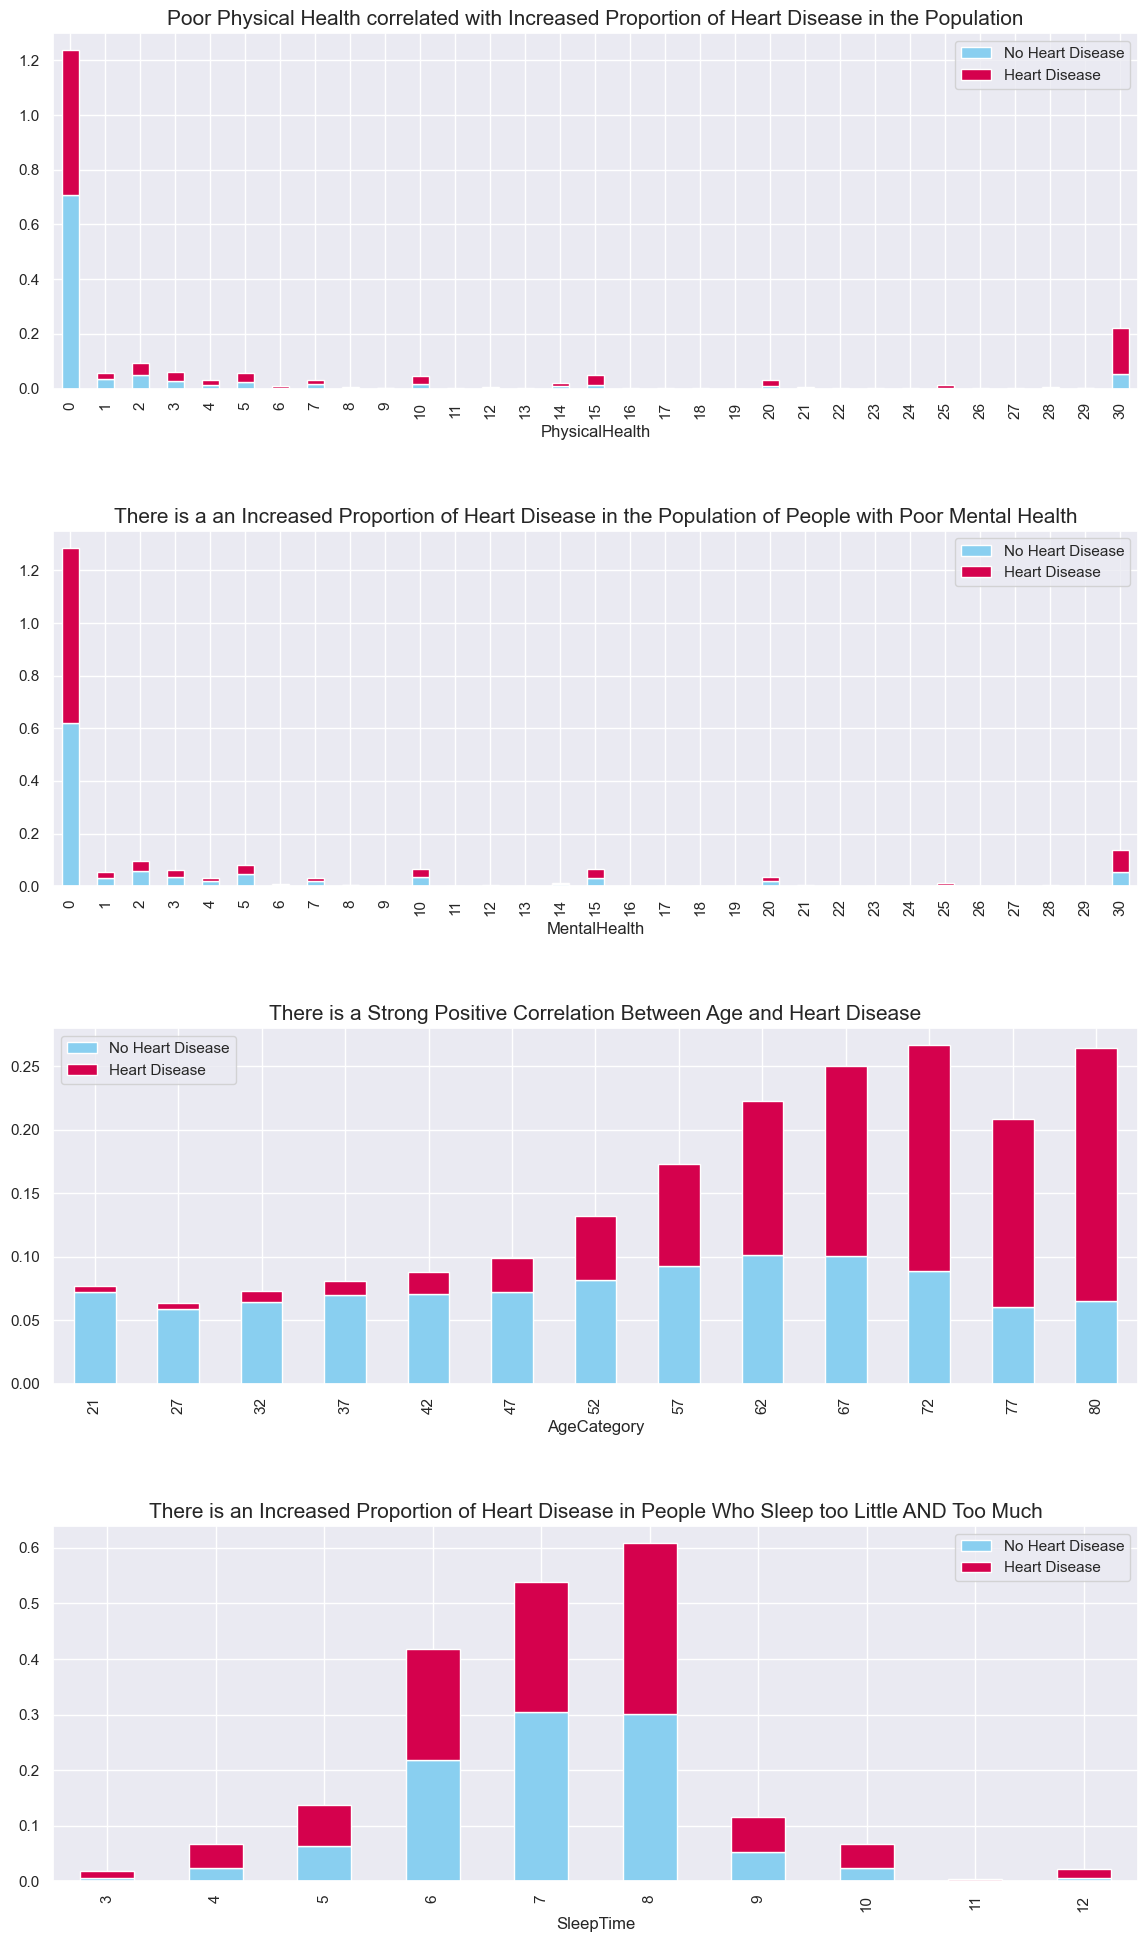

In [23]:
# Set the style and figure size of the plot
sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(14,6*len(num_col_list[1:]))})

# create subplots
f, axes = plt.subplots(len(num_col_list[1:]))

# adjust space between subplots
f.subplots_adjust(hspace=0.4)

# plot normalized stacked bar charts for each numerical feature
for index, i in enumerate(num_col_list[1:]):
    # group data by HeartDisease and i, then normalize each group by its sum
    plot_data = lifestyle_df.groupby(["HeartDisease", i]).size().reset_index(name="count")
    plot_data['count'] = plot_data.groupby('HeartDisease')['count'].apply(lambda x: x / x.sum())
    plot_data = plot_data.pivot(index=i, columns='HeartDisease', values='count')
    
    # plot the stacked bar chart
    plot_data.plot(kind='bar', stacked=True, ax=axes[index], color=custom_palette)


# set legends, titles and font sizes for each plot
axes[0].legend(labels = ['No Heart Disease', 'Heart Disease'])
axes[0].set_title('Poor Physical Health correlated with Increased Proportion of Heart Disease in the Population', fontsize = 15)

axes[1].legend(labels = ['No Heart Disease', 'Heart Disease'])
axes[1].set_title('There is a an Increased Proportion of Heart Disease in the Population of People with Poor Mental Health', fontsize = 15)

axes[2].legend(labels = ['No Heart Disease', 'Heart Disease'])
axes[2].set_title('There is a Strong Positive Correlation Between Age and Heart Disease', fontsize = 15)

axes[3].legend(labels = ['No Heart Disease', 'Heart Disease'])
axes[3].set_title('There is an Increased Proportion of Heart Disease in People Who Sleep too Little AND Too Much', fontsize = 15)
# show plot
plt.show()

This isnt the most visually clear set of visualisations, im going to create the same plots but using kernel density instead. Given the features arent truely continuous, but rather discrete values from continuous data, the KDE plots are going to infer that rate of CVD in the population decreases between these categorical values. This is obviously not the case and the KDE plot is to be used purely in aiding CVD class distribution visualisation for each categorical value in the numeric columns.

/var/folders/ql/q61dcs4n5p90gmz0jz8_fzt80000gn/T/ipykernel_87854/2020215275.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(lifestyle_df[lifestyle_df['HeartDisease']=='No'][i], shade=True, alpha = 0.3, color= custom_palette[0], ax=axes[index])
/var/folders/ql/q61dcs4n5p90gmz0jz8_fzt80000gn/T/ipykernel_87854/2020215275.py:14: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(lifestyle_df[lifestyle_df['HeartDisease']=='Yes'][i], shade=True, alpha = 0.3, color= custom_palette[1], ax=axes[index])
/var/folders/ql/q61dcs4n5p90gmz0jz8_fzt80000gn/T/ipykernel_87854/2020215275.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(

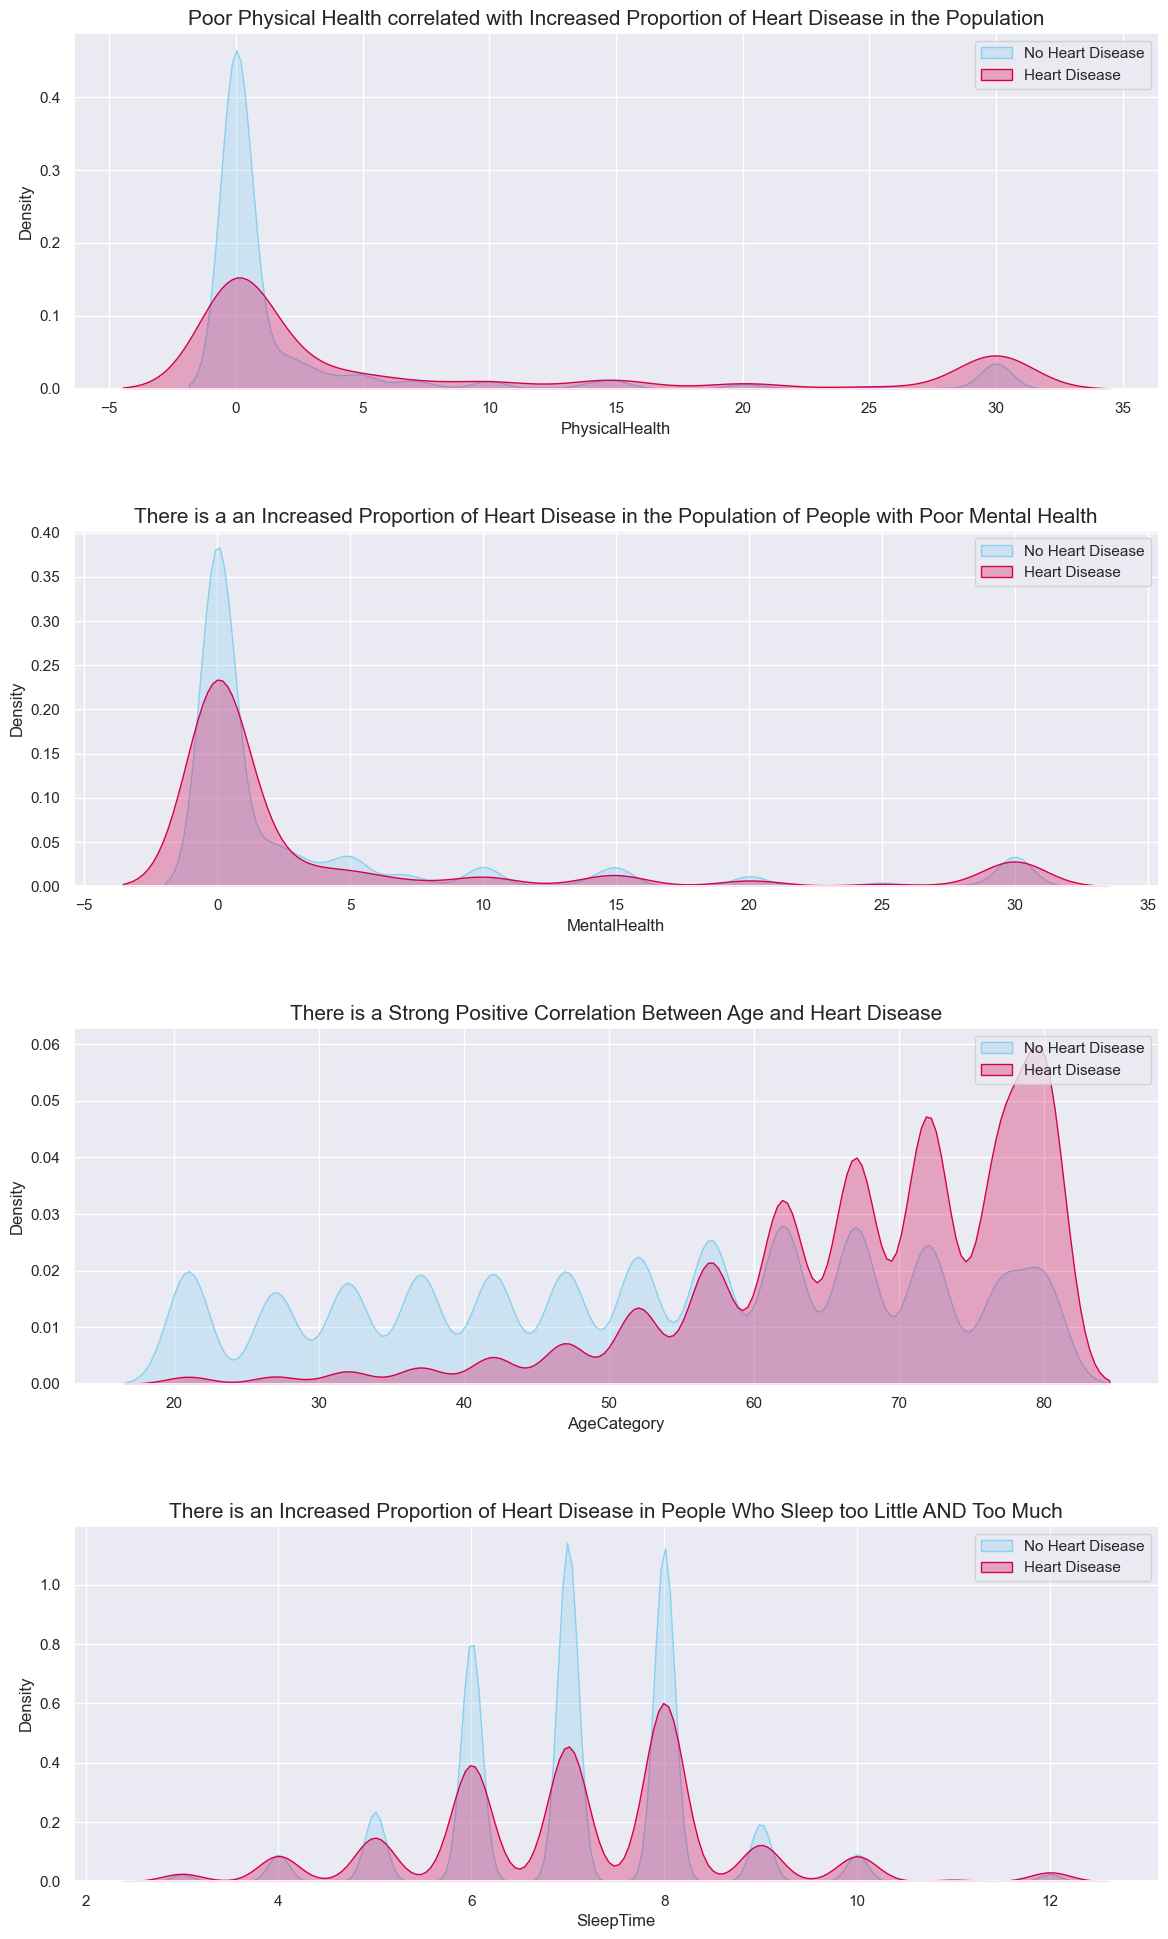

In [24]:
# Set the style and figure size of the plot
sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(14,6*len(num_col_list[1:]))})

# create subplots
f, axes = plt.subplots(len(num_col_list[1:]))

# adjust space between subplots
f.subplots_adjust(hspace=0.4)

# plot KDE plots for each numerical feature
for index, i in enumerate(num_col_list[1:]):
    sns.kdeplot(lifestyle_df[lifestyle_df['HeartDisease']=='No'][i], shade=True, alpha = 0.3, color= custom_palette[0], ax=axes[index])
    sns.kdeplot(lifestyle_df[lifestyle_df['HeartDisease']=='Yes'][i], shade=True, alpha = 0.3, color= custom_palette[1], ax=axes[index])
    
# set legends, titles and font sizes for each plot
axes[0].legend(labels = ['No Heart Disease', 'Heart Disease'])
axes[0].set_title('Poor Physical Health correlated with Increased Proportion of Heart Disease in the Population', fontsize = 15)

axes[1].legend(labels = ['No Heart Disease', 'Heart Disease'])
axes[1].set_title('There is a an Increased Proportion of Heart Disease in the Population of People with Poor Mental Health', fontsize = 15)

axes[2].legend(labels = ['No Heart Disease', 'Heart Disease'])
axes[2].set_title('There is a Strong Positive Correlation Between Age and Heart Disease', fontsize = 15)

axes[3].legend(labels = ['No Heart Disease', 'Heart Disease'])
axes[3].set_title('There is an Increased Proportion of Heart Disease in People Who Sleep too Little AND Too Much', fontsize = 15)

# show plot
plt.show()


#### Lets create boxplots for these same numeric features

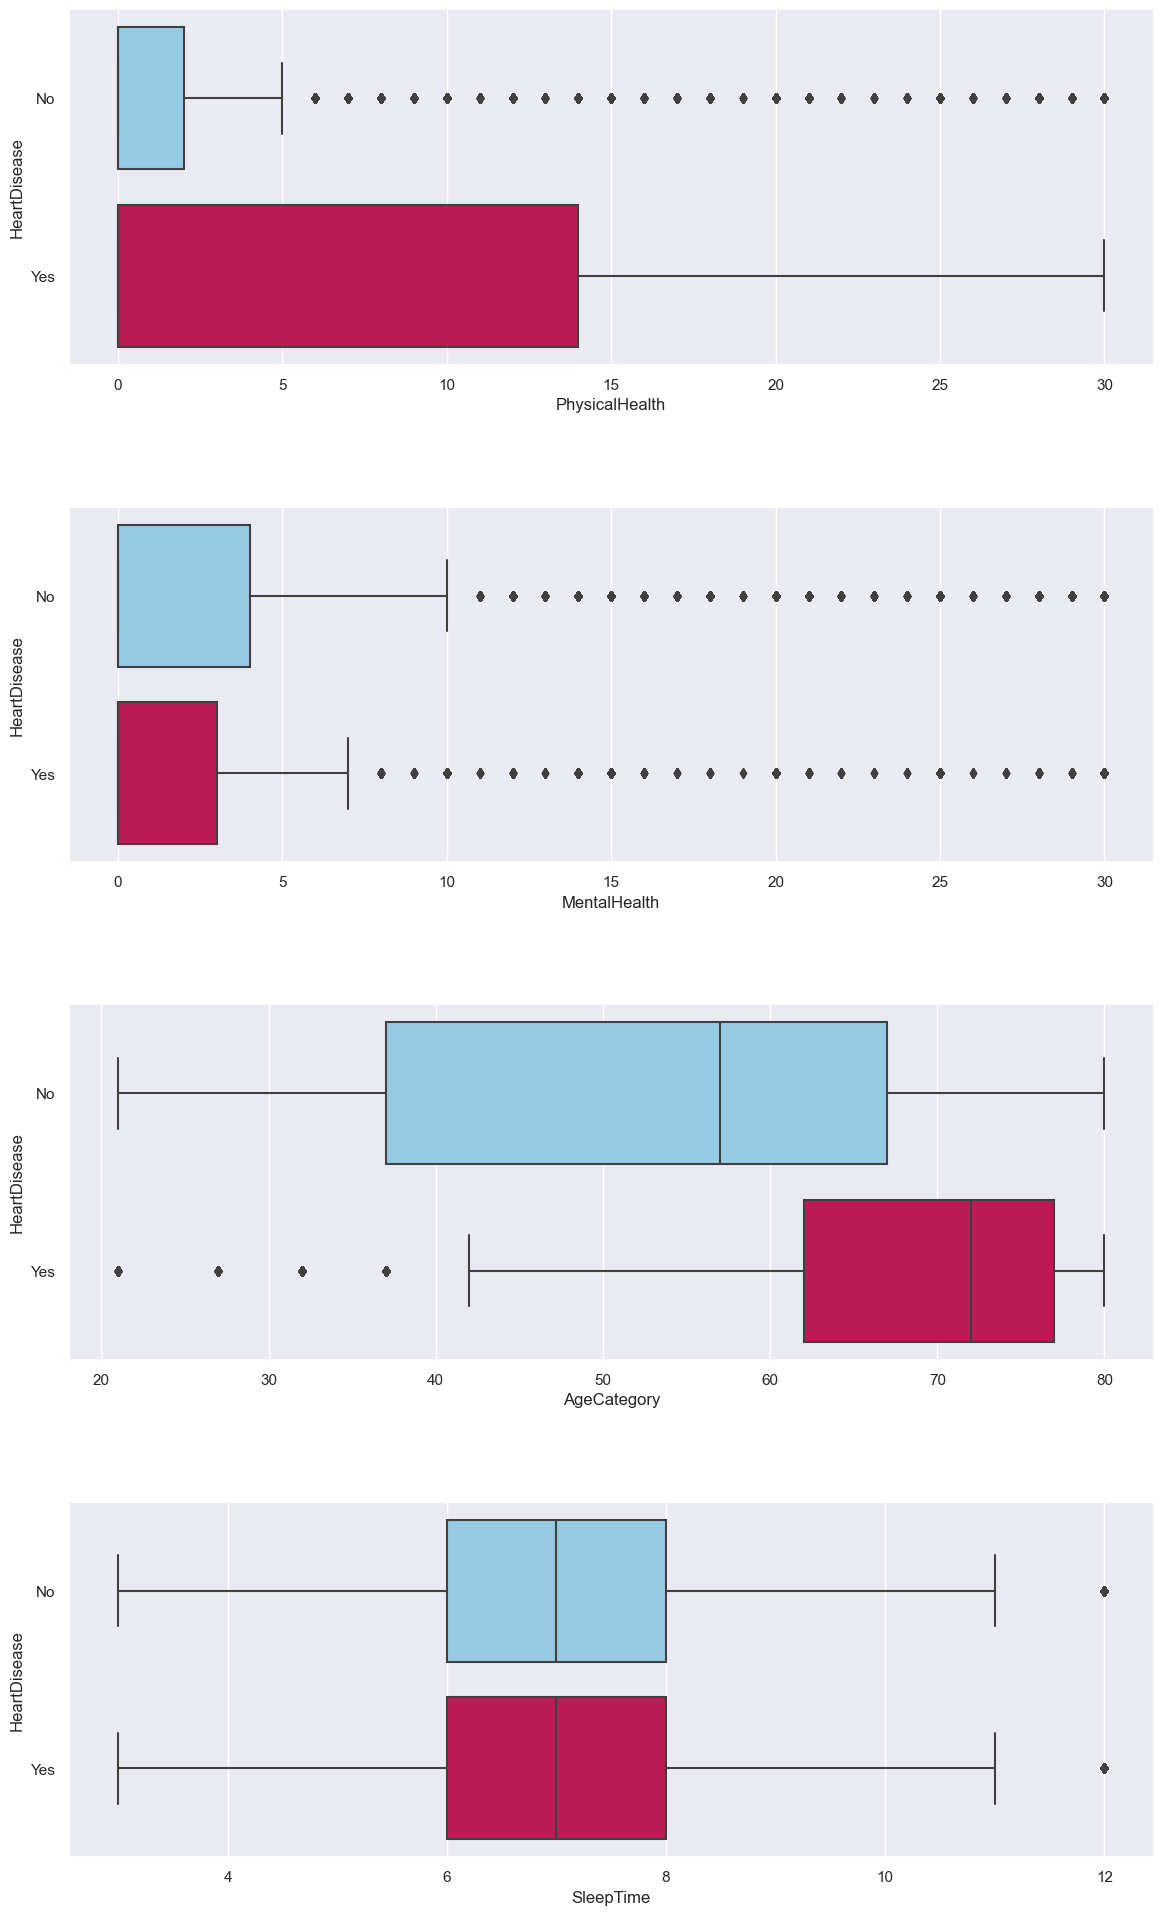

In [25]:
# Setting the figure size and subplots
sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(14,6*len(num_col_list[1:]))})
f, axes = plt.subplots(len(num_col_list[1:]))
f.subplots_adjust(hspace=0.4)

# iterating through numeric columns and plotting boxplots for each feature 
for index, column in enumerate(num_col_list[1:]):
    sns.boxplot(data=lifestyle_df, x=column, y=lifestyle_df["HeartDisease"], palette = custom_palette, ax = axes[index])




## Analysis of categorical features

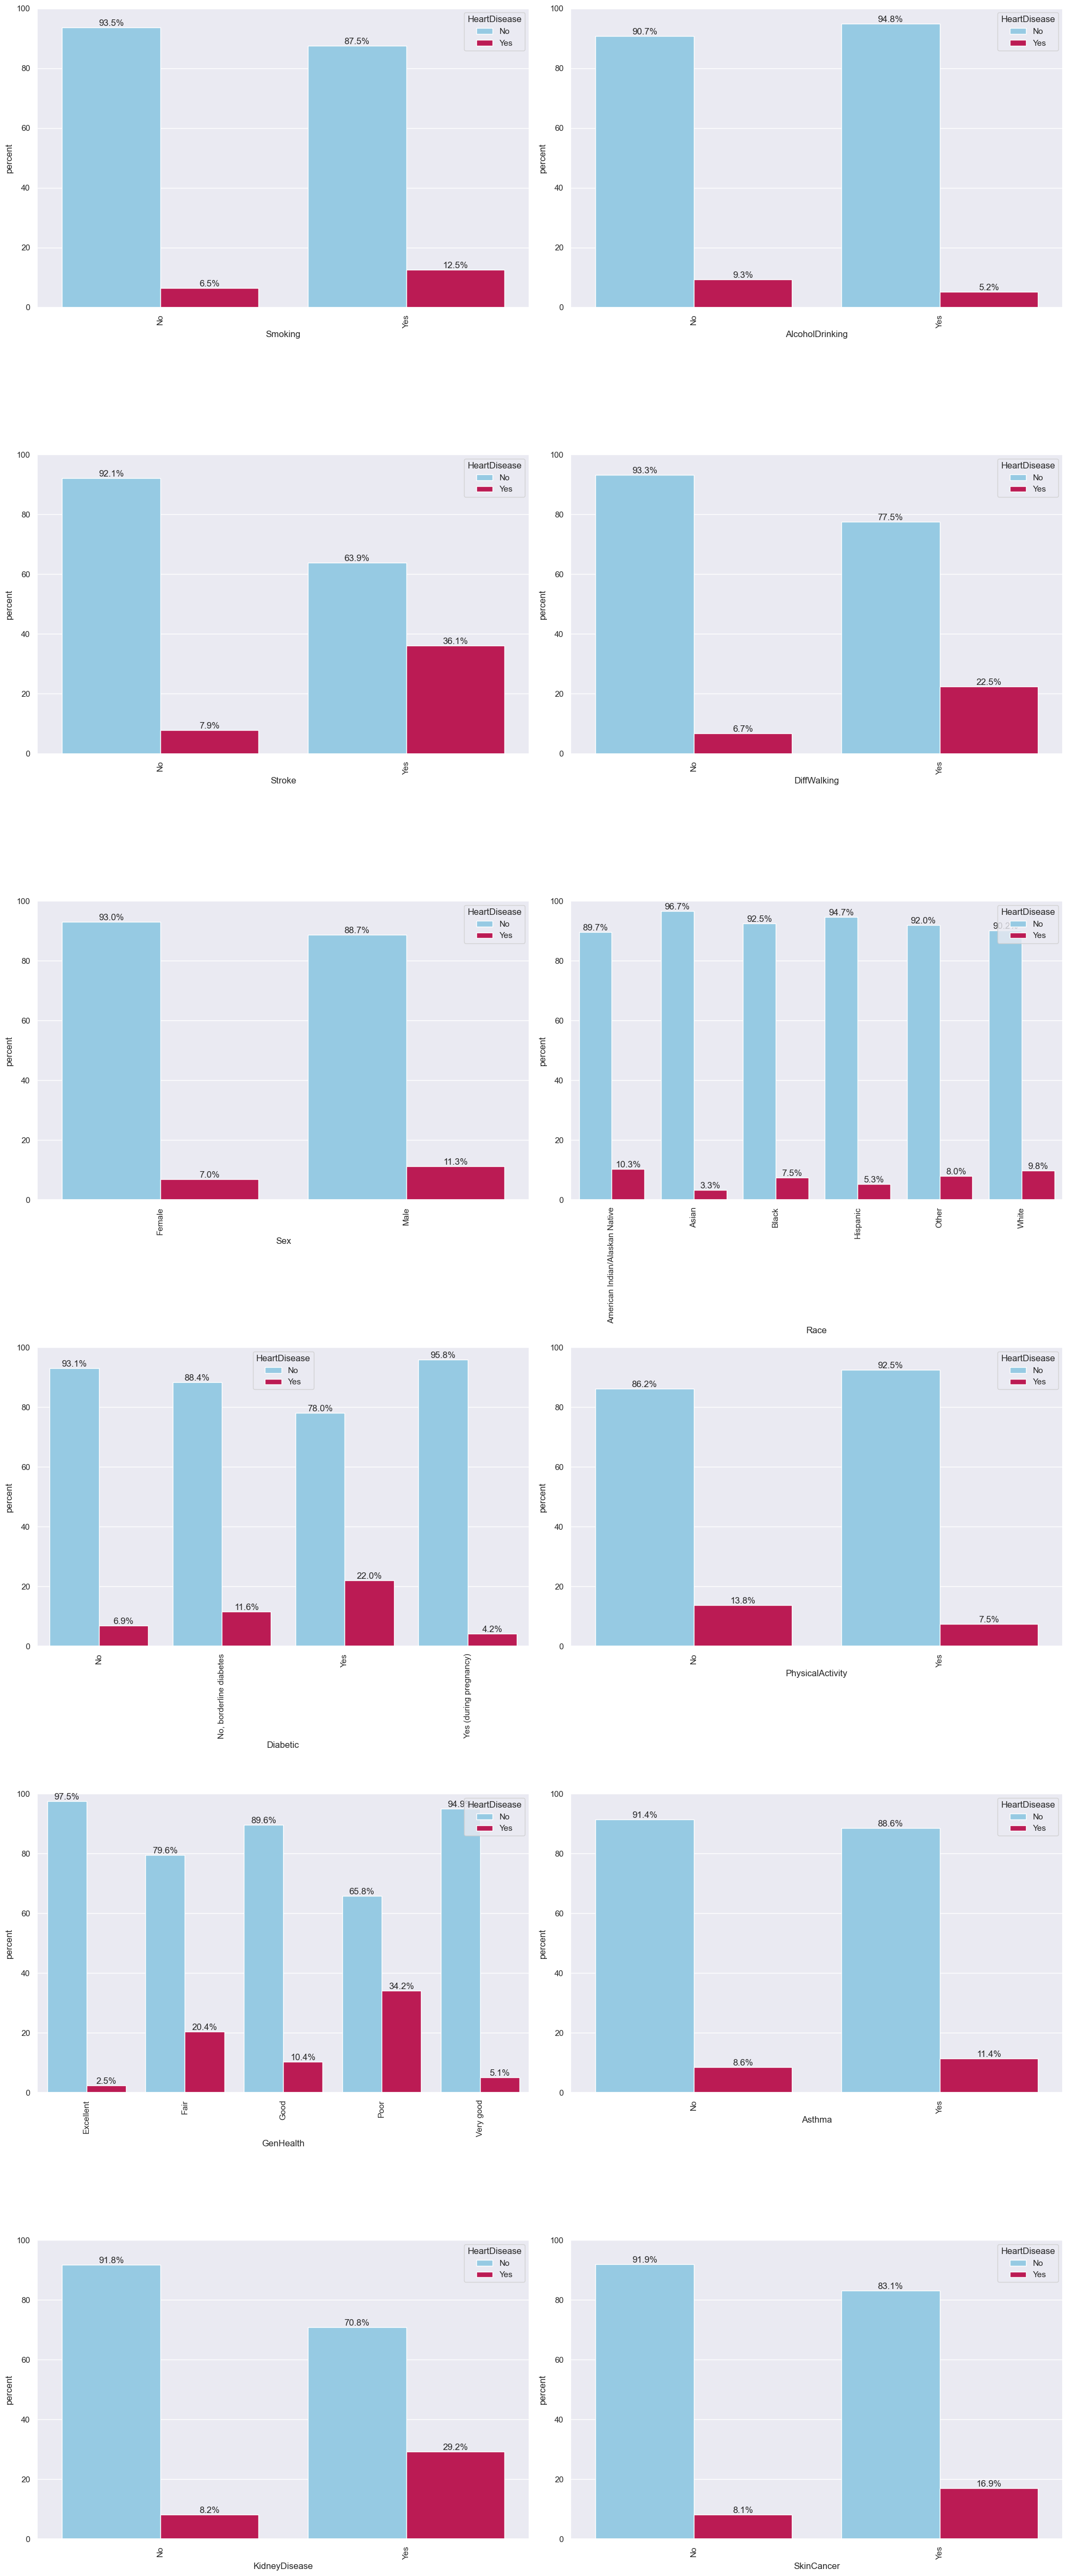

In [26]:
# create subplots
fig, axs = plt.subplots(6, 2, figsize=(20, 4*len(cat_col_list[1:])))

# iterate through each categorical feature
for i, col in enumerate(cat_col_list[1:]):
    row, col_idx = i // 2, i % 2
    
    # group data by the current categorical feature and the target variable 'HeartDisease' and calculate the percentage of each value
    plot_data = lifestyle_df.groupby(col)['HeartDisease'].value_counts(normalize=True).mul(100).rename('percent').reset_index()
    
    # create a bar plot for the current categorical feature with the percentage on the y-axis and the 'HeartDisease' variable as hue
    ax = axs[row, col_idx]
    sns.barplot(data=plot_data, x=col, y='percent', hue='HeartDisease', palette=custom_palette, ax=ax)
    
    # customize the axis labels, tick marks and bar annotations
    ax.tick_params(axis='x', labelrotation=90)
    ax.set_ylim(0, 100)
    ax.set_xlabel(col)
    ax.set_ylabel('percent')
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height:.1f}%', xy=(p.get_x() + p.get_width() / 2, height), ha='center', va='bottom')
    
    # set layout of the subplots
    fig.tight_layout()

Key takeaways:

Some interesting insights from the numeric data: 

1. People with heart disease have a higher BMI value than people without.

2. There is an increased proportion of CVD in people with a lower quality of mental health. 

3. There is an increased proportion of CVD in people that get less sleep and too much sleep. (<6 hours a night and >=10 hours a night).

4. There is an increased proportion of CVD in the elderly population.

5. Lower levels of physical activity are linked to an increased proportion of CD in the population. 

These observations are all well established in medical literature. 
https://www.cdc.gov/heartdisease/risk_factors.htm#print

Increased rates of heart disease are prevalent in the following categorical features:
- People that smoke.
- People that have had a stroke.
- People that have difficulty walking.
- Males.
- White and native American/Alaskan.
- People that have not exercised in the last 30 days.
- People of poor health.
- People with kidney disease.
- Very slight CVD rate increase in people with Asthma. 
- People with skin cancer.

Whether the means of the two BMI distributions are statistically significant can be confirmed by a two sample unpaired t-test.

Whether or not these increased proportions in our numeric/categorical features are statistically significant will be confirmed by a chi squared test.

<center> H0 = heart disease prevalence is independent of our feature.<center>
<center> H1 = heart disease prevalence is dependent on our feature.<center>

&nbsp;

<center> Our threshold for rejecting H0 is &lt 0.05 <center>
    


In [27]:
# Perform t-test on BMI between patients with heart disease and those without
two_sample_test = stats.ttest_ind(lifestyle_df[lifestyle_df['HeartDisease']== 'Yes']['BMI'], lifestyle_df[lifestyle_df['HeartDisease']== 'No']['BMI'])

# Print the results
print("BMI two sample t-tests: ", two_sample_test)
print()

BMI two sample t-tests:  Ttest_indResult(statistic=25.56180589437239, pvalue=5.800663575470183e-144)



In [28]:
BMI_pvalue = two_sample_test[1]
BMI_pvalue 

5.800663575470183e-144

In [29]:
from scipy.stats import chi2_contingency

p_values = []

# loop through categorical columns and calculate chi-square test for each
for i in cat_col_list[1:]:
    contingency_table = pd.crosstab(lifestyle_df[i], lifestyle_df['HeartDisease'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    p_values.append(p)
    print(f"{i} Chi-square test results:")
    print(f"Chi2: {chi2:.2f}")
    print(f"P-value: {p}")
    print(f"Degrees of freedom: {dof}")
    print("Expected frequencies:")
    print(expected)
    print()




Smoking Chi-square test results:
Chi2: 3225.76
P-value: 0.0
Degrees of freedom: 1
Expected frequencies:
[[157555.44497777  15557.55502223]
 [114918.55502223  11347.44497777]]

AlcoholDrinking Chi-square test results:
Chi2: 399.60
P-value: 6.746419107573217e-89
Degrees of freedom: 1
Expected frequencies:
[[252969.90044726  24979.09955274]
 [ 19504.09955274   1925.90044726]]

Stroke Chi-square test results:
Chi2: 11064.26
P-value: 0.0
Degrees of freedom: 1
Expected frequencies:
[[261704.42417137  25841.57582863]
 [ 10769.57582863   1063.42417137]]

DiffWalking Chi-square test results:
Chi2: 11360.81
P-value: 0.0
Degrees of freedom: 1
Expected frequencies:
[[232849.64245321  22992.35754679]
 [ 39624.35754679   3912.64245321]]

Sex Chi-square test results:
Chi2: 1683.27
P-value: 0.0
Degrees of freedom: 1
Expected frequencies:
[[144222.94127511  14241.05872489]
 [128251.05872489  12663.94127511]]

Race Chi-square test results:
Chi2: 1034.48
P-value: 2.0590901918944588e-221
Degrees of freedo

In [30]:
# Create a dictionary with categorical column names as keys and their corresponding p-values as values
cat_col_to_dict = cat_col_list[1:]
p_value_dict = {cat_col_to_dict[i]: [p_values[i]] for i in range(len(cat_col_to_dict))}

# Convert the dictionary to a dataframe and transpose it for better readability
p_value_df = pd.DataFrame.from_dict(p_value_dict)
p_value_df.T

,0
Smoking,0.000000e+00
AlcoholDrinking,6.746419e-89
Stroke,0.000000e+00
DiffWalking,0.000000e+00
Sex,0.000000e+00
Race,2.059090e-221
Diabetic,0.000000e+00
PhysicalActivity,0.000000e+00
GenHealth,0.000000e+00
Asthma,5.726347e-79


In [31]:
# Perform Chi-square test for each numerical feature and print results
from scipy.stats import chi2_contingency

p_values_num = []

for i in num_col_list[1:]:
    contingency_table = pd.crosstab(lifestyle_df[i], lifestyle_df['HeartDisease'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    p_values_num.append(p)
    print(f"{i} Chi-square test results:")
    print(f"Chi2: {chi2:.2f}")
    print(f"P-value: {p}")
    print(f"Degrees of freedom: {dof}")
    print("Expected frequencies:")
    print(expected)
    print()

PhysicalHealth Chi-square test results:
Chi2: 8388.15
P-value: 0.0
Degrees of freedom: 30
Expected frequencies:
[[1.88749262e+05 1.86377376e+04]
 [9.46626876e+03 9.34731244e+02]
 [1.34571916e+04 1.32880840e+03]
 [7.78161695e+03 7.68383053e+02]
 [4.03278885e+03 3.98211147e+02]
 [6.85419383e+03 6.76806172e+02]
 [1.14858486e+03 1.13415136e+02]
 [4.17658949e+03 4.12410506e+02]
 [8.33679664e+02 8.23203364e+01]
 [1.62913384e+02 1.60866160e+01]
 [4.91743583e+03 4.85564168e+02]
 [7.55408429e+01 7.45915712e+00]
 [5.37887207e+02 5.31127935e+01]
 [8.28218880e+01 8.17811203e+00]
 [2.60115336e+03 2.56846639e+02]
 [4.49240482e+03 4.43595175e+02]
 [1.20137244e+02 1.18627559e+01]
 [9.92042394e+01 9.79576056e+00]
 [1.51991816e+02 1.50081836e+01]
 [3.09444417e+01 3.05555834e+00]
 [2.87328242e+03 2.83717579e+02]
 [5.64280995e+02 5.57190050e+01]
 [8.00914961e+01 7.90850394e+00]
 [4.09558787e+01 4.04412133e+00]
 [5.91584914e+01 5.84150859e+00]
 [1.03481853e+03 1.02181466e+02]
 [5.91584914e+01 5.84150859e+0

In [32]:
# Convert numerical column names to a dictionary
num_col_to_dict = num_col_list[1:]

# Print p-values for numerical columns
p_values_num

# Create a dictionary of numerical column names and their p-values
p_value_dict_num = {num_col_to_dict[i]: [p_values_num[i]] for i in range(len(num_col_to_dict))}

# Convert dictionary to a dataframe and transpose it for better readability
p_value_num_df = pd.DataFrame.from_dict(p_value_dict_num)
p_value_num_df.T

,0
PhysicalHealth,0.000000e+00
MentalHealth,7.107540e-197
AgeCategory,0.000000e+00
SleepTime,0.000000e+00


Every time we run a test with a significance level of 0.05, we are leaving 5% room for error. We've done 12 tests on the categorical features and 5 on the numerical columns, we expect 5% of tests (0.85 tests) to return a significant result. Given the chance of a type 1 error, we need to perform an error correction on our tests.

We'll use a 'Holm Bonferroni Correction'. 

In [33]:
# Perform Holm-Bonferroni correction on the p-values for categorical variables
# Create an empty list to store the corrected p-values and corresponding variable names
holm_bon_correction = []

# Loop through each categorical variable and its corresponding p-value
for i, j in zip(cat_col_to_dict, p_values):
    # Append the p-value and variable name as a tuple to the list
    holm_bon_correction.append((j,i))

# Display the list of corrected p-values and variable names
holm_bon_correction

[(0.0, 'Smoking'),
 (6.746419107573217e-89, 'AlcoholDrinking'),
 (0.0, 'Stroke'),
 (0.0, 'DiffWalking'),
 (0.0, 'Sex'),
 (2.0590901918944588e-221, 'Race'),
 (0.0, 'Diabetic'),
 (0.0, 'PhysicalActivity'),
 (0.0, 'GenHealth'),
 (5.726346599319616e-79, 'Asthma'),
 (0.0, 'KidneyDisease'),
 (0.0, 'SkinCancer')]

In [34]:
# Perform Holm-Bonferroni correction on the p-values for numeric variables

# Loop through each numerical variable and its corresponding p-value
for i, j in zip(num_col_to_dict, p_values_num):
    # Append the p-value and variable name as a tuple to the list
    holm_bon_correction.append((j,i))

# Display the list of corrected p-values and variable names
holm_bon_correction

[(0.0, 'Smoking'),
 (6.746419107573217e-89, 'AlcoholDrinking'),
 (0.0, 'Stroke'),
 (0.0, 'DiffWalking'),
 (0.0, 'Sex'),
 (2.0590901918944588e-221, 'Race'),
 (0.0, 'Diabetic'),
 (0.0, 'PhysicalActivity'),
 (0.0, 'GenHealth'),
 (5.726346599319616e-79, 'Asthma'),
 (0.0, 'KidneyDisease'),
 (0.0, 'SkinCancer'),
 (0.0, 'PhysicalHealth'),
 (7.107540307799481e-197, 'MentalHealth'),
 (0.0, 'AgeCategory'),
 (0.0, 'SleepTime')]

In [35]:
holm_bon_correction.append((BMI_pvalue, 'BMI'))

In [36]:
# Create a DataFrame to store the results of the significance test
results = pd.DataFrame()

# Create empty lists to store the feature names, p-values, and significance thresholds
feature_name =[]
pvals = []
significance = []

# Set a counter variable to keep track of the number of features tested
counter = 1

# Loop through each feature and its corresponding Holm-Bonferroni corrected p-value
for i,j in holm_bon_correction:
    # Append the feature name and p-value to their respective lists
    feature_name.append(j)
    pvals.append(i)
    
    # Calculate the significance threshold for the current feature
    significance.append(0.05/(len(holm_bon_correction)-counter+1))
    
    # Check if the p-value is less than the significance threshold and print a message if so
    if i < 0.05/(len(holm_bon_correction)-counter+1):
        print(f'The feature `{j}`, is significant')
        
    # Increment the counter variable
    counter += 1

# Add the feature name, p-values, and significance thresholds to the results DataFrame
results['colours'] = feature_name
results['pvalues'] = pvals
results['significance_threshold'] = significance

The feature `Smoking`, is significant
The feature `AlcoholDrinking`, is significant
The feature `Stroke`, is significant
The feature `DiffWalking`, is significant
The feature `Sex`, is significant
The feature `Race`, is significant
The feature `Diabetic`, is significant
The feature `PhysicalActivity`, is significant
The feature `GenHealth`, is significant
The feature `Asthma`, is significant
The feature `KidneyDisease`, is significant
The feature `SkinCancer`, is significant
The feature `PhysicalHealth`, is significant
The feature `MentalHealth`, is significant
The feature `AgeCategory`, is significant
The feature `SleepTime`, is significant
The feature `BMI`, is significant


In [37]:
results

,colours,pvalues,significance_threshold
0,Smoking,0.000000e+00,0.002941
1,AlcoholDrinking,6.746419e-89,0.003125
2,Stroke,0.000000e+00,0.003333
3,DiffWalking,0.000000e+00,0.003571
4,Sex,0.000000e+00,0.003846
5,Race,2.059090e-221,0.004167
6,Diabetic,0.000000e+00,0.004545
7,PhysicalActivity,0.000000e+00,0.005000
8,GenHealth,0.000000e+00,0.005556
9,Asthma,5.726347e-79,0.006250


The differences in heart disease prevelance in all our features is statistically significant, we can therefore reject our nulll hypothesis in all instances. This completes EDA.

Questions for tomorrow:
1. What are the next steps for my project in regards to EDA. I know I have to test for multicollinearity, but im unsure whether there are a few steps I might be missing. Could we just lay out  a checklist of things to be done

2. In the cases where my features have more than 2 ordinal categorical variables, i've chosen to create dummy variables. Is this correct, talk about model interpreting as double etc.?


Check for multicollinearity if there are some > threshold check p_value stats package. If two show multi conlinearity we can remove the one with less significance. VIF maybe? 

Check model assumptions

Baseline model on stats package.




---

# Data Preprocessing

As mentioned previously, we have quite a few opportunities to create dummies / one hot encode: 
Firstly, our target variable: 

    - `HeartDisease` 

Secondly, our independent variables:

    - `Smoking`
    - `AlcoholDrinking` 
    - `Stroke`
    - `PhysicalHealth`
    - `DiffWalking`
    - `Sex`
    - `Race` : We'll create dummy variables for this column. Need to be careful of model bias with this feature. 
    - `Diabetic`
    - `PhysicalActivity`
    - `GenHealth`
    - `Asthma`
    - `KidneyDisease`
    - `SkinCancer`


For `Race`, we'll create dummy variables.

For `Diabetes` we'll create dummy variables.

For the `GenHealth` column, we have some inherent order. However, if i were to label encode this column, any moddel I create may interpret fair(1) as two times better than poor (0) despite there being no such relationship. With this in mind im going to create dummy variables instead.



In [38]:
# Creating Binary columns
binary_columns = [
                'HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 
                'DiffWalking', 'Sex', 'PhysicalActivity', 'Asthma', 'KidneyDisease', 
                'SkinCancer'
                ]

for i in binary_columns:
    if i != 'Sex':
        lifestyle_df[i] = lifestyle_df[i].map({'Yes':1, 'No':0}).astype('int')
    else:
        lifestyle_df[i] = lifestyle_df[i].map({'Male':1, 'Female':0}).astype('int')

In [39]:
lifestyle_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299379 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      299379 non-null  int64  
 1   BMI               299379 non-null  float64
 2   Smoking           299379 non-null  int64  
 3   AlcoholDrinking   299379 non-null  int64  
 4   Stroke            299379 non-null  int64  
 5   PhysicalHealth    299379 non-null  int64  
 6   MentalHealth      299379 non-null  int64  
 7   DiffWalking       299379 non-null  int64  
 8   Sex               299379 non-null  int64  
 9   AgeCategory       299379 non-null  int64  
 10  Race              299379 non-null  object 
 11  Diabetic          299379 non-null  object 
 12  PhysicalActivity  299379 non-null  int64  
 13  GenHealth         299379 non-null  object 
 14  SleepTime         299379 non-null  int64  
 15  Asthma            299379 non-null  int64  
 16  KidneyDisease     29

In [40]:
# Creating dummy variables for Race, Genhealth and Diabetes columns
diabetes = pd.get_dummies(lifestyle_df['Diabetic'], drop_first=True)
diabetes = diabetes.add_prefix('Diabetic_')

race = pd.get_dummies(lifestyle_df['Race'], drop_first=True)
race = race.add_prefix('Race_')

generalhealth = pd.get_dummies(lifestyle_df['GenHealth'], drop_first=True)
generalhealth = generalhealth.add_prefix('GenHealth_')


In [41]:
# Concatenating the three dataframes
df_list = [lifestyle_df, race, generalhealth, diabetes]
lifestyle_df = pd.concat(df_list, axis=1)
lifestyle_df.shape

(299379, 30)

In [42]:
lifestyle_df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,...,Race_Hispanic,Race_Other,Race_White,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,"Diabetic_No, borderline diabetes",Diabetic_Yes,Diabetic_Yes (during pregnancy)
0,0,16.60,1,0,0,3,30,0,0,57,...,0,0,1,0,0,0,1,0,1,0
1,0,20.34,0,0,1,0,0,0,0,80,...,0,0,1,0,0,0,1,0,0,0
2,0,26.58,1,0,0,20,30,0,1,67,...,0,0,1,1,0,0,0,0,1,0
3,0,24.21,0,0,0,0,0,0,0,77,...,0,0,1,0,1,0,0,0,0,0
4,0,23.71,0,0,0,28,0,1,0,42,...,0,0,1,0,0,0,1,0,0,0


In [43]:
lifestyle_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299379 entries, 0 to 319794
Data columns (total 30 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   HeartDisease                      299379 non-null  int64  
 1   BMI                               299379 non-null  float64
 2   Smoking                           299379 non-null  int64  
 3   AlcoholDrinking                   299379 non-null  int64  
 4   Stroke                            299379 non-null  int64  
 5   PhysicalHealth                    299379 non-null  int64  
 6   MentalHealth                      299379 non-null  int64  
 7   DiffWalking                       299379 non-null  int64  
 8   Sex                               299379 non-null  int64  
 9   AgeCategory                       299379 non-null  int64  
 10  Race                              299379 non-null  object 
 11  Diabetic                          299379 non-null  o

In [44]:
# Removing object type columns
object_cols = list(lifestyle_df.select_dtypes("object").columns)
lifestyle_df.drop(object_cols, axis=1, inplace=True)

In [45]:
# Creating a copy of the cleaned dataframe
df_cleaned = lifestyle_df.copy()

In [46]:
# Saving the cleaned data to a CSV
df_cleaned.to_csv('../src/data/Lifestyle_heart_data_clean.csv', encoding='utf-8', index=False)

---